### Uso de MSE (Mean Square Error) y MAE (Mean Absolute Error)

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

error cuadrático medio(MSE): 2.4882
error absoluto medio(MAE): 1.1983


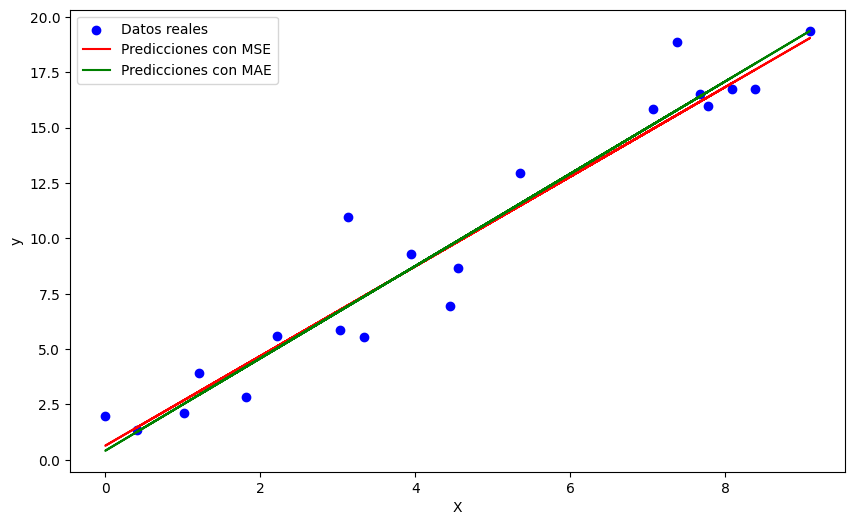

In [8]:
#Generar un conjunto de datos sinteticos
np.random.seed(42)

#Datos reales (relación ineal)con ruido añadido
X = np.linspace(0, 10, 100) #100 valores entre 0 y 10
y = 2 * X + 1 + np.random.normal(0, 2, X.shape[0]) # y = 2X + ruido normal con media 0 y desviacion 

#dividir los datos en entrenamiento y prueba(80 % entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Reformatear X para que sea del tamaño adecuado para scikit-learn
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

#Vamos a entrenar un modelo con el método de minimos cuadrados MSE
model_mse = LinearRegression()
model_mse.fit(X_train, y_train)

#Realizar las prediccines con el modelo entrenado con MSE
y_pred_mse = model_mse.predict(X_test)

# Entrenar el modelo con el método de minimos cuadrados MAE
model_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0)
model_mae.fit(X_train, y_train)

#Realizar las predicciones con el modelo entrenado con MAE
y_pred_mae = model_mae.predict(X_test)

#Evaluar y comparar los modelos con MSE y MAE
mse = mean_squared_error(y_test, y_pred_mse)
mae = mean_absolute_error(y_test, y_pred_mae)

#Mostrar resultados
print(f'error cuadrático medio(MSE): {mse:.4f}')
print(f'error absoluto medio(MAE): {mae:.4f}')

#Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred_mse, color='red', label='Predicciones con MSE')
plt.plot(X_test, y_pred_mae, color='green', label='Predicciones con MAE')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

